In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\asus\Downloads\archive (7)\breast-cancer.csv") 
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis'].map({'M': 1, 'B': 0}) 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [6]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
y_pred_linear = svm_linear.predict(X_test)
print("Linear Kernel SVM:\n", classification_report(y_test, y_pred_linear))

Linear Kernel SVM:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [8]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)
print("RBF Kernel SVM:\n", classification_report(y_test, y_pred_rbf))

RBF Kernel SVM:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

svm_vis = SVC(kernel='rbf', C=1, gamma='scale')
svm_vis.fit(X_reduced, y_train)

SVC(C=1)

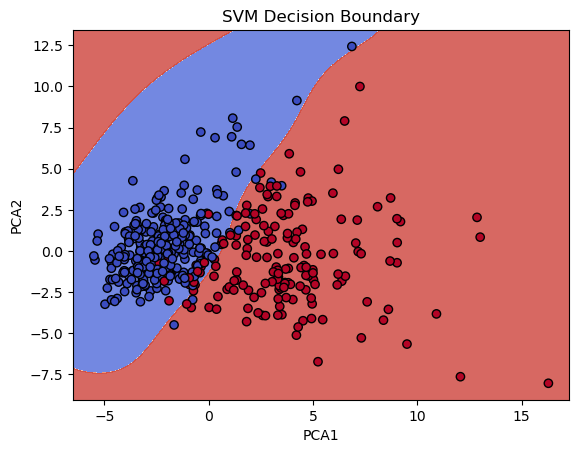

In [10]:
def plot_decision_boundary(clf, X, y):
    import numpy as np
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("SVM Decision Boundary")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.show()

plot_decision_boundary(svm_vis, X_reduced, y_train)

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001,

In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVC(kernel='rbf', C=grid.best_params_['C'],
                             gamma=grid.best_params_['gamma']),
                         X_train, y_train, cv=5)

print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validation scores: [0.98901099 0.97802198 0.98901099 0.97802198 0.94505495]
Average accuracy: 0.9758241758241759
